In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('loanpred_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe([0.25,0.5,0.75,0.9,0.95,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000


In [6]:
#Checking for null values

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending = False)

Credit_History       8.14
Self_Employed        5.21
LoanAmount           3.58
Dependents           2.44
Loan_Amount_Term     2.28
Gender               2.12
Married              0.49
Loan_Status          0.00
Property_Area        0.00
CoapplicantIncome    0.00
ApplicantIncome      0.00
Education            0.00
Loan_ID              0.00
dtype: float64

# Feature Engineering

In [7]:
df = pd.read_csv('loanpred_train.csv', usecols =['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Gender', 'Married'])
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History
0,Male,No,0,No,NaN,1.0
1,Male,Yes,1,No,128.0,1.0
2,Male,Yes,0,Yes,66.0,1.0
3,Male,Yes,0,No,120.0,1.0
4,Male,No,0,No,141.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          601 non-null    object 
 1   Married         611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Self_Employed   582 non-null    object 
 4   LoanAmount      592 non-null    float64
 5   Credit_History  564 non-null    float64
dtypes: float64(2), object(4)
memory usage: 28.9+ KB


In [9]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

C:\Users\swaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

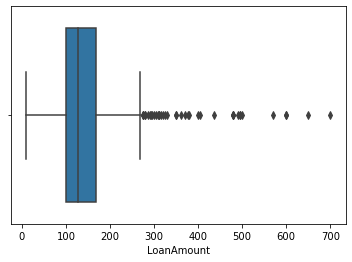

In [10]:
sns.boxplot(df['LoanAmount'])

## Imputation of numerical missing values

## median Imputation in loan amount

In [11]:
df['LoanAmount_median'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [12]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median
0,Male,No,0,No,NaN,1.0,128.0
1,Male,Yes,1,No,128.0,1.0,128.0
2,Male,Yes,0,Yes,66.0,1.0,66.0
3,Male,Yes,0,No,120.0,1.0,120.0
4,Male,No,0,No,141.0,1.0,141.0


## Random Sample Imputation

In [13]:
df['LoanAmount'].isnull().sum()

22

In [14]:
df['LoanAmount'].dropna().sample(df['LoanAmount'].isnull().sum(),random_state=0)

255    255.0
278    436.0
599    192.0
151    152.0
357     67.0
473     93.0
439    138.0
607    157.0
110    136.0
365    133.0
561    600.0
246    112.0
82     167.0
478     86.0
54     286.0
89     175.0
535    126.0
15     125.0
223    175.0
67     312.0
210    214.0
358    100.0
Name: LoanAmount, dtype: float64

In [15]:

df[df['LoanAmount'].isnull()].index

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')

In [16]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [17]:
impute_nan(df,"LoanAmount")

In [18]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random
0,Male,No,0,No,NaN,1.0,128.0,255.0
1,Male,Yes,1,No,128.0,1.0,128.0,128.0
2,Male,Yes,0,Yes,66.0,1.0,66.0,66.0
3,Male,Yes,0,No,120.0,1.0,120.0,120.0
4,Male,No,0,No,141.0,1.0,141.0,141.0


## Capturing NAN values with a new feature

In [19]:
data = df[['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Gender', 'Married']]

In [20]:
data.head()

,Credit_History,Self_Employed,LoanAmount,Dependents,Gender,Married
0,1.0,No,NaN,0,Male,No
1,1.0,No,128.0,1,Male,Yes
2,1.0,Yes,66.0,0,Male,Yes
3,1.0,No,120.0,0,Male,Yes
4,1.0,No,141.0,0,Male,No


In [21]:
data['Loanamount_nan'] = np.where(data['LoanAmount'].isnull(),1,0)

<ipython-input-21-b49fdf28edb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loanamount_nan'] = np.where(data['LoanAmount'].isnull(),1,0)


In [22]:
data.head()

,Credit_History,Self_Employed,LoanAmount,Dependents,Gender,Married,Loanamount_nan
0,1.0,No,NaN,0,Male,No,1
1,1.0,No,128.0,1,Male,Yes,0
2,1.0,Yes,66.0,0,Male,Yes,0
3,1.0,No,120.0,0,Male,Yes,0
4,1.0,No,141.0,0,Male,No,0


In [23]:
data['LoanAmount'].median()

128.0

In [24]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

C:\Users\swaga\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-24-8339d795fb38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)


In [25]:
data.head()

,Credit_History,Self_Employed,LoanAmount,Dependents,Gender,Married,Loanamount_nan
0,1.0,No,None,0,Male,No,1
1,1.0,No,None,1,Male,Yes,0
2,1.0,Yes,None,0,Male,Yes,0
3,1.0,No,None,0,Male,Yes,0
4,1.0,No,None,0,Male,No,0


## End of Distribution imputation

In [26]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random
0,Male,No,0,No,NaN,1.0,128.0,255.0
1,Male,Yes,1,No,128.0,1.0,128.0,128.0
2,Male,Yes,0,Yes,66.0,1.0,66.0,66.0
3,Male,Yes,0,No,120.0,1.0,120.0,120.0
4,Male,No,0,No,141.0,1.0,141.0,141.0


<AxesSubplot:>

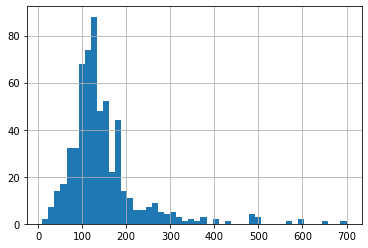

In [27]:
df['LoanAmount'].hist(bins = 50)

C:\Users\swaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

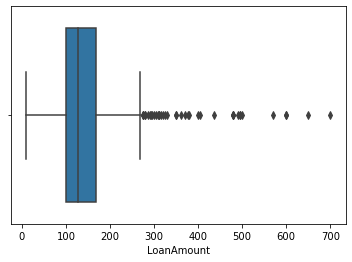

In [28]:
sns.boxplot(df['LoanAmount'])

In [29]:
extreme=df.LoanAmount.mean()+3*df.LoanAmount.std()

In [30]:
def impute_nan(df,variable,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)

In [31]:

impute_nan(df,'LoanAmount',extreme)

In [32]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random,LoanAmount_end_distribution
0,Male,No,0,No,NaN,1.0,128.0,255.0,403.174138
1,Male,Yes,1,No,128.0,1.0,128.0,128.0,128.000000
2,Male,Yes,0,Yes,66.0,1.0,66.0,66.0,66.000000
3,Male,Yes,0,No,120.0,1.0,120.0,120.0,120.000000
4,Male,No,0,No,141.0,1.0,141.0,141.0,141.000000


<AxesSubplot:>

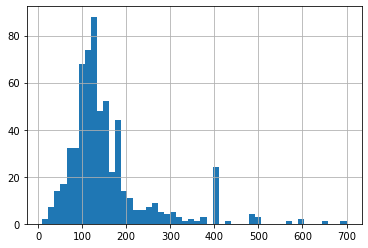

In [33]:
df['LoanAmount_end_distribution'].hist(bins=50)

C:\Users\swaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount_end_distribution'>

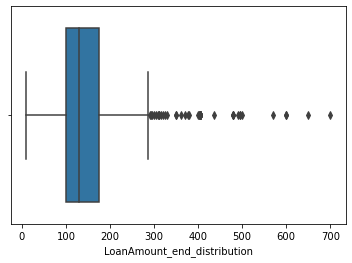

In [34]:
sns.boxplot(df['LoanAmount_end_distribution'])

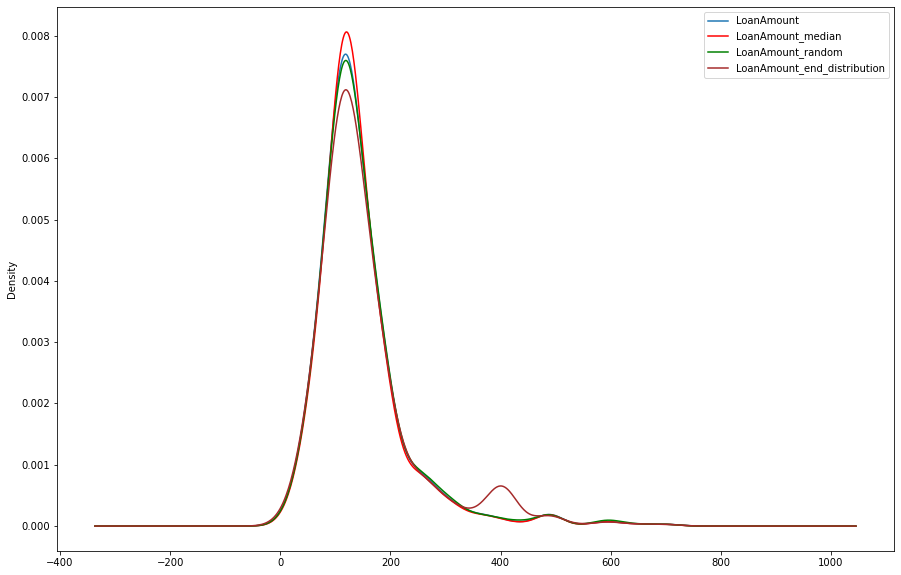

In [35]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
df['LoanAmount'].plot(kind='kde', ax=ax)
df.LoanAmount_median.plot(kind='kde', ax=ax, color='red')
df.LoanAmount_random.plot(kind='kde', ax=ax, color='green')
df.LoanAmount_end_distribution.plot(kind='kde', ax=ax, color='brown')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
df['LoanAmount_end_distribution'] = round(df['LoanAmount_end_distribution'], 0)

In [37]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random,LoanAmount_end_distribution
0,Male,No,0,No,NaN,1.0,128.0,255.0,403.0
1,Male,Yes,1,No,128.0,1.0,128.0,128.0,128.0
2,Male,Yes,0,Yes,66.0,1.0,66.0,66.0,66.0
3,Male,Yes,0,No,120.0,1.0,120.0,120.0,120.0
4,Male,No,0,No,141.0,1.0,141.0,141.0,141.0


 ## Handling Categorical Missing Values

In [38]:
df.isnull().sum()

Gender                         13
Married                         3
Dependents                     15
Self_Employed                  32
LoanAmount                     22
Credit_History                 50
LoanAmount_median               0
LoanAmount_random               0
LoanAmount_end_distribution     0
dtype: int64

In [39]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [40]:
df['Gender'] = df['Gender'].fillna('Male')

In [41]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [42]:
df['Married'] = df['Married'].fillna("Yes")

<AxesSubplot:>

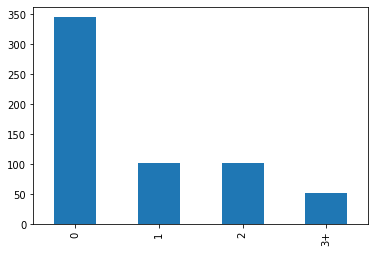

In [43]:
df['Dependents'].value_counts().plot.bar()

In [44]:
mode = df['Dependents'].mode()

In [45]:
df['Dependents'] =df['Dependents'].fillna(0)

In [46]:
df.isnull().sum()

Gender                          0
Married                         0
Dependents                      0
Self_Employed                  32
LoanAmount                     22
Credit_History                 50
LoanAmount_median               0
LoanAmount_random               0
LoanAmount_end_distribution     0
dtype: int64

In [47]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [48]:
df['Self_Employed'] = df['Self_Employed'].fillna("No")

In [49]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [50]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [51]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [52]:
df.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random,LoanAmount_end_distribution
0,Male,No,0,No,NaN,1.0,128.0,255.0,403.0
1,Male,Yes,1,No,128.0,1.0,128.0,128.0,128.0
2,Male,Yes,0,Yes,66.0,1.0,66.0,66.0,66.0
3,Male,Yes,0,No,120.0,1.0,120.0,120.0,120.0
4,Male,No,0,No,141.0,1.0,141.0,141.0,141.0


## Creating dummy variables

In [53]:
dummy= pd.get_dummies(df[['Gender', 'Married', 'Self_Employed']], drop_first = True)

df = pd.concat([df,dummy],axis=1)

df = df.drop(['Gender', 'Married', 'Self_Employed', ], axis = 1)

In [54]:
df.head()

,Dependents,LoanAmount,Credit_History,LoanAmount_median,LoanAmount_random,LoanAmount_end_distribution,Gender_Male,Married_Yes,Self_Employed_Yes
0,0,NaN,1.0,128.0,255.0,403.0,1,0,0
1,1,128.0,1.0,128.0,128.0,128.0,1,1,0
2,0,66.0,1.0,66.0,66.0,66.0,1,1,1
3,0,120.0,1.0,120.0,120.0,120.0,1,1,0
4,0,141.0,1.0,141.0,141.0,141.0,1,0,0


# Mercedes Benz dataset

In [55]:
mb = pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
mb.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [56]:
for i in mb.columns:
    print(len(mb[i].unique()))

47
27
44
7
4
29
12


Using one hot encoding can be a huge problem as there are many number of categories present.

so we will choose the top 10 variables in a category and apply one hot encoding to them.

In [57]:
mb['X1'].value_counts().sort_values(ascending = False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [58]:
lst_10=mb['X1'].value_counts().sort_values(ascending = False).head(10).index
lst_10=list(lst_10)

In [59]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [60]:
import numpy as np
for categories in lst_10:
    mb[categories]=np.where(mb['X1']==categories,1,0)

In [61]:
lst_10.append('X1')

In [62]:
mb[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


## Ordinal Number Encoding

In [63]:
import datetime

In [64]:
today_date=datetime.datetime.today()

In [65]:
today_date

datetime.datetime(2021, 4, 4, 10, 38, 14, 489491)

In [66]:
today_date-datetime.timedelta(3)

datetime.datetime(2021, 4, 1, 10, 38, 14, 489491)

In [67]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [68]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [69]:
data.head()

,Day
0,2021-04-04 10:38:14.489491
1,2021-04-03 10:38:14.489491
2,2021-04-02 10:38:14.489491
3,2021-04-01 10:38:14.489491
4,2021-03-31 10:38:14.489491


In [70]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-04-04 10:38:14.489491,Sunday
1,2021-04-03 10:38:14.489491,Saturday
2,2021-04-02 10:38:14.489491,Friday
3,2021-04-01 10:38:14.489491,Thursday
4,2021-03-31 10:38:14.489491,Wednesday


In [71]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [72]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [73]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [74]:
data.head()

,Day,weekday,weekday_ordinal
0,2021-04-04 10:38:14.489491,Sunday,7
1,2021-04-03 10:38:14.489491,Saturday,6
2,2021-04-02 10:38:14.489491,Friday,5
3,2021-04-01 10:38:14.489491,Thursday,4
4,2021-03-31 10:38:14.489491,Wednesday,3


## Count Or Frequency Encoding

In [75]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
columns=[1,3,5,6,7,8,9,13]

In [77]:
train_set=train_set[columns]

In [78]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [79]:
# unique values in each column

for i in train_set.columns:
    print(len(train_set[i].unique()))

9
16
7
15
6
5
2
42


In [80]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [81]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [82]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [83]:
train_set['Employment'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Employment, dtype: int64

In [84]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [85]:
train_set = train_set.replace("?", np.nan)

In [86]:
train_set.isnull().sum()

Employment     0
Degree         0
Status         0
Designation    0
family_job     0
Race           0
Sex            0
Country        0
dtype: int64

In [87]:
country_map=train_set['Country'].value_counts().to_dict()

In [88]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


## Advantages

Easy To Use

Not increasing feature space 

## Disadvantages

It will provide same weight if the frequencies are same

# Target Guided Ordinal Encoding

Ordering the labels according to the target

Replace the labels by the joint probability of being 1 or 0

In [89]:
titanic = pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
titanic.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [90]:
titanic['Cabin'].fillna('Missing',inplace=True)

In [91]:

titanic['Cabin']=titanic['Cabin'].astype(str).str[0]

In [92]:
titanic.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [93]:
titanic.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [94]:
titanic.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [95]:
titanic.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [96]:
ordinal_labels=titanic.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [97]:
enumerate(ordinal_labels,0)

In [98]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [99]:
titanic['Cabin_ordinal_labels']=titanic['Cabin'].map(ordinal_labels2)
titanic.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean Encoding

In [100]:
mean_ordinal=titanic.groupby(['Cabin'])['Survived'].mean().to_dict()

In [101]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [102]:
titanic['mean_ordinal_encode']=titanic['Cabin'].map(mean_ordinal)
titanic.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding

- Probability of Survived based on Cabin--- Categorical Feature

- Probability of Not Survived---1-pr(Survived)

- pr(Survived)/pr(Not Survived)

- Dictonary to map cabin with probability

- replace with the categorical feature

In [103]:
titanic['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [104]:
prob_titanic=titanic.groupby(['Cabin'])['Survived'].mean()

In [105]:
prob_titanic=pd.DataFrame(prob_titanic)
prob_titanic

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [106]:
prob_titanic['Died']=1-prob_titanic['Survived']

In [107]:
prob_titanic.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [108]:

prob_titanic['Probability_ratio']=prob_titanic['Survived']/prob_titanic['Died']
prob_titanic.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [109]:
probability_encoded=prob_titanic['Probability_ratio'].to_dict()

In [110]:
titanic['Cabin_encoded']=titanic['Cabin'].map(probability_encoded)
titanic.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode,Cabin_encoded
0,0,M,1,0.299854,0.428274
1,1,C,4,0.593220,1.458333
2,1,M,1,0.299854,0.428274
3,1,C,4,0.593220,1.458333
4,0,M,1,0.299854,0.428274
